## Generating Images using Amazon Nova Canvas

In [16]:
import boto3
import json
import base64
import io
import uuid
from PIL import Image

# Set up the Amazon Bedrock client
bedrock_client = boto3.client(
    service_name="bedrock-runtime",
    region_name="us-east-1"
)

# Define the model ID
model_id = "amazon.nova-canvas-v1:0"

# Prepare the input prompt
prompt = "create me an image of indian flag which should be held by cricketer ms dhoni in indian cricket team jersey on the moon"

# Create the request payload
body = json.dumps({
        "taskType": "TEXT_IMAGE",
        "textToImageParams": {
            "text": prompt
        },
        "imageGenerationConfig": {
            "numberOfImages": 1,
            "height": 1024,
            "width": 1024,
            "cfgScale": 8.0,
            "seed": 0
        }
    })

accept = "application/json"
content_type = "application/json"

# Invoke the Amazon Bedrock model
response = bedrock_client.invoke_model(
    modelId=model_id,
    body=body,
    accept=accept, 
    contentType=content_type
)

# Process the response
result = json.loads(response["body"].read())

base64_image = result.get("images")[0]
base64_bytes = base64_image.encode('ascii')
image_bytes = base64.b64decode(base64_bytes)

image = Image.open(io.BytesIO(image_bytes))
image.show()
unique_id = uuid.uuid4()
image.save(f"D:\Data-AI Blogs\Blog-2\generated-images\{unique_id}.png")

print(f"Generated Image is Stored Successfully at : D:\Data-AI Blogs\Blog-2\generated-images\{unique_id}.png")

Generated Image is Stored Successfully at : D:\Data-AI Blogs\Blog-2\generated-images\e4e392df-27a1-4fe2-a714-8ba9a68566b4.png


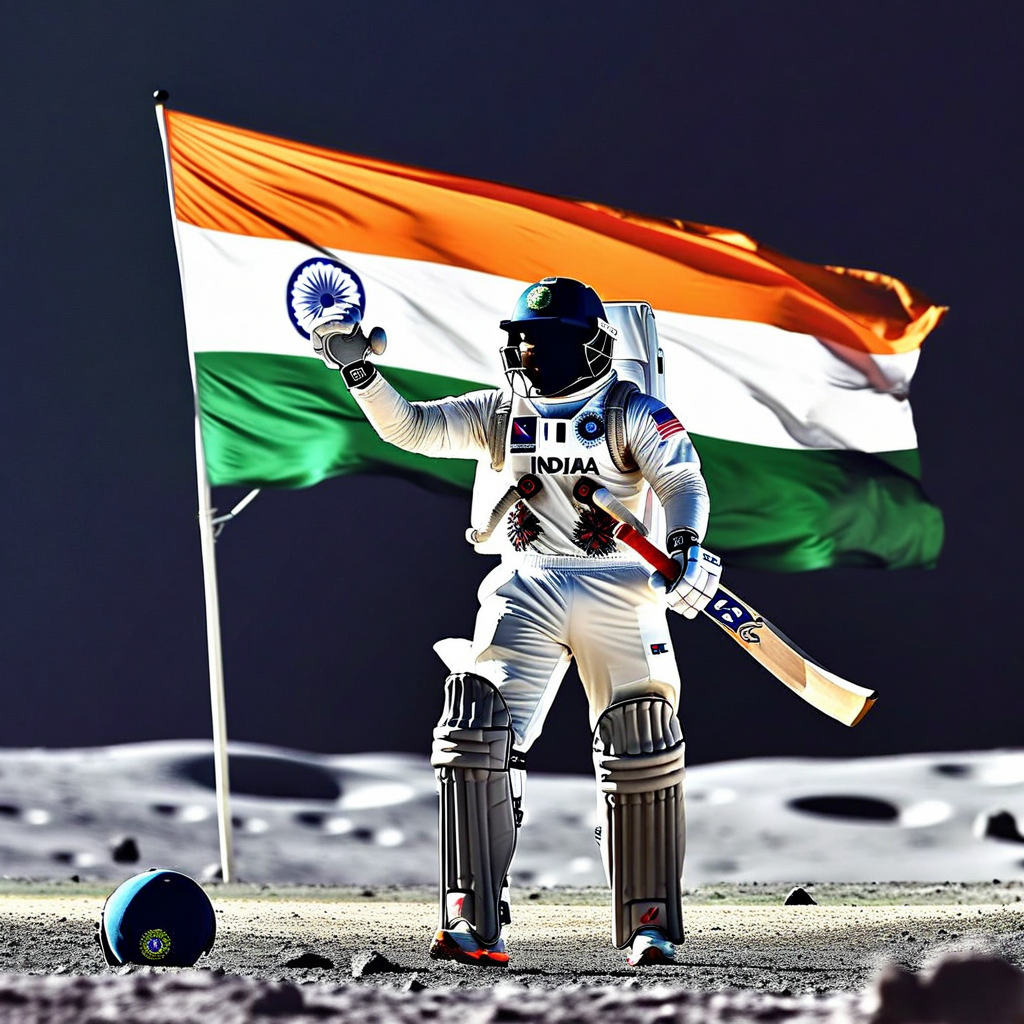